<a href="https://colab.research.google.com/github/OlleThomsen/annda_lab_1b/blob/main/assignment_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

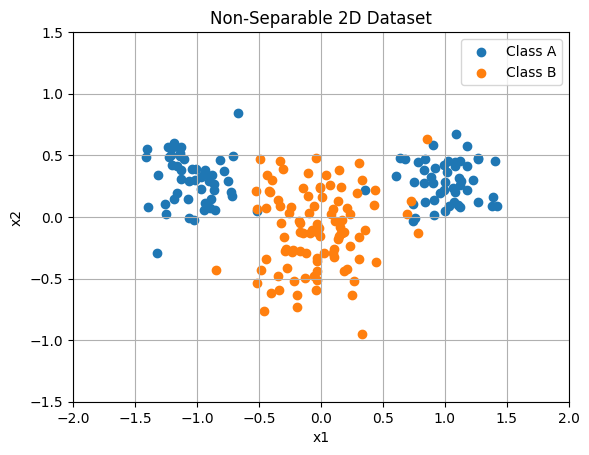

In [2]:
ndata = 100
mA = np.array([1.0, 0.3])
sigmaA = 0.2
mB = np.array([0.0, -0.1])
sigmaB = 0.3

classA_1 = np.concatenate([
    np.random.randn(ndata // 2) * sigmaA - mA[0],
    np.random.randn(ndata // 2) * sigmaA + mA[0]
])
classA_2 = np.random.randn(ndata) * sigmaA + mA[1]

classA = np.vstack([classA_1, classA_2])

classB_1 = np.random.randn(ndata) * sigmaB + mB[0]
classB_2 = np.random.randn(ndata) * sigmaB + mB[1]

classB = np.vstack([classB_1, classB_2])

X = np.hstack([classA, classB])

T_delta = np.hstack([-np.ones(ndata), np.ones(ndata)])
T_perc = np.hstack([np.zeros(ndata), np.ones(ndata)])

perm = np.random.permutation(2 * ndata)
X = X[:, perm]
T_perc = T_perc[perm]
T_delta = T_delta[perm]

plt.figure()
plt.scatter(X[0, T_delta == -1], X[1, T_delta == -1], label="Class A")
plt.scatter(X[0, T_delta == 1], X[1, T_delta == 1], label="Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.title(f"Non-Separable 2D Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
import numpy as np

class BackPropagation:
    def __init__(self, n_input, n_hidden, n_output, eta=0.01, alpha=0.9):
        self.eta = eta
        self.alpha = alpha
        self.n_hidden = n_hidden

        self.W = np.random.normal(0, 0.1, (n_hidden, n_input + 1))
        self.V = np.random.normal(0, 0.1, (n_output, n_hidden + 1))

        self.dw = np.zeros(self.W.shape)
        self.dv = np.zeros(self.V.shape)

    def _phi(self, x):
        return (2 / (1 + np.exp(-x))) - 1

    def _phi_prime(self, out):
        return 0.5 * (1 + out) * (1 - out)

    def train_batch(self, X, T, epochs, mse_debug=False):
        n_data = X.shape[1]

        X_with_bias = np.vstack([X, np.ones((1, n_data))])

        for epoch in range(epochs):
            # Forward Pass
            hin = self.W @ X_with_bias
            hout_raw = self._phi(hin)

            hout = np.vstack([hout_raw, np.ones((1, n_data))])

            oin = self.V @ hout
            out = self._phi(oin)

            # Backward Pass
            delta_o = (out - T) * self._phi_prime(out)

            delta_h_raw = (self.V.T @ delta_o) * self._phi_prime(hout)
            delta_h = delta_h_raw[:self.n_hidden, :]

            # Update hidden-to-output weights (V)
            self.dv = (self.alpha * self.dv) - (1 - self.alpha) * (delta_o @ hout.T)
            self.V += self.dv * self.eta

            # Update input-to-hidden weights (W)
            self.dw = (self.alpha * self.dw) - (1 - self.alpha) * (delta_h @ X_with_bias.T)
            self.W += self.dw * self.eta

            mse = np.mean(np.square(out - T))

            if epoch % 100 == 0 and mse_debug:
                print(f"Epoch {epoch}: MSE = {mse:.6f}")

        print(f"number of hidden nodes = {self.n_hidden}")
        print(f"Final MSE = {mse}")
        acc = self.accuracy(X, T)
        print(f"Final Accuracy = {acc}%\n")

    def accuracy(self, X, T):
        out = self.predict(X)
        preds = np.where(out >= 0, 1, -1)

        correct_hits = np.sum(preds == T)
        acc = (correct_hits / T.size) * 100
        return acc

    def predict(self, X):
        n_data = X.shape[1]
        X_with_bias = np.vstack([X, np.ones((1, n_data))])

        hout_raw = self._phi(self.W @ X_with_bias)
        hout = np.vstack([hout_raw, np.ones((1, n_data))])
        return self._phi(self.V @ hout)

In [55]:
for n in range(1, 15):
  nn = BackPropagation(n_input=2, n_hidden=n, n_output=1, eta=0.1, alpha=0.9)
  nn.train_batch(X, T_delta, epochs=10000)

number of hidden nodes = 1
Final MSE = 0.5942540486853298
Final Accuracy = 78.0%

number of hidden nodes = 2
Final MSE = 0.08073497813068765
Final Accuracy = 98.0%

number of hidden nodes = 3
Final MSE = 0.06169746455351955
Final Accuracy = 98.5%

number of hidden nodes = 4
Final MSE = 0.06167935802637437
Final Accuracy = 98.5%

number of hidden nodes = 5
Final MSE = 0.041074407788480746
Final Accuracy = 99.0%

number of hidden nodes = 6
Final MSE = 0.061612839680195375
Final Accuracy = 98.5%

number of hidden nodes = 7
Final MSE = 0.04163972394387709
Final Accuracy = 99.0%

number of hidden nodes = 8
Final MSE = 0.062438344630184404
Final Accuracy = 98.5%

number of hidden nodes = 9
Final MSE = 0.06151709341564137
Final Accuracy = 98.5%

number of hidden nodes = 10
Final MSE = 0.06461818063098083
Final Accuracy = 98.0%

number of hidden nodes = 11
Final MSE = 0.021381554788083287
Final Accuracy = 99.5%

number of hidden nodes = 12
Final MSE = 0.0616227714620973
Final Accuracy = 98.5%
